## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print(f"Train data shape: {taxi_data.shape}")
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# перевод признака pickup_datetime в тип данных datetime с форматом `год-месяц-день час:минута:секунда` с пропуском некорректных значений
taxi_data['pickup_datetime'] = pd.to_datetime(
    taxi_data['pickup_datetime'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

# определение временных рамок за которые представлены данные  (без учёта времени)
print(
    f"Данные охватывают период: "
    f"{taxi_data['pickup_datetime'].dt.date.min()} — {taxi_data['pickup_datetime'].dt.date.max()}"
)

Данные охватывают период: 2016-01-01 — 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
print(f"Общее количество пропущенных значений: {taxi_data.isnull().sum().sum()}")

Общее количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
print(f"1. Количество уникальных таксопарков: {taxi_data['vendor_id'].nunique()}")
print(f"2. Максимальное количество пассажиров в поездке: {taxi_data['passenger_count'].max()}")
print(f"3.1. Средняя длительность поездки: {round(taxi_data['trip_duration'].mean())} сек.")
print(f"3.2. Медианная длительность поездки: {round(taxi_data['trip_duration'].median())} сек.")
print(f"4.1. Минимальное время поездки: {taxi_data['trip_duration'].min()} сек.")
print(f"4.2. Максимальное время поездки: {taxi_data['trip_duration'].max()} сек.")

1. Количество уникальных таксопарков: 2
2. Максимальное количество пассажиров в поездке: 9
3.1. Средняя длительность поездки: 959 сек.
3.2. Медианная длительность поездки: 662 сек.
4.1. Минимальное время поездки: 1 сек.
4.2. Максимальное время поездки: 3526282 сек.


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
def add_datetime_features(df):
    """
    Добавляет в исходные данные новые признаки, извлечённые из даты и времени начала поездки.
    
    Параметры:
    df: Исходный DataFrame (taxi_data) с колонкой 'pickup_datetime' типа datetime
    
    Возвращает:
    DataFrame: taxi_data с добавленными колонками:
        - pickup_date: дата без времени (тип date)
        - pickup_hour: час дня (0–23)
        - pickup_day_of_week: день недели (0 — понедельник, 6 — воскресенье)
    """
    # добавляем новые колонки
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

taxi_data = add_datetime_features(taxi_data)

print(f"Количество поездок в субботу: {(taxi_data['pickup_day_of_week'] == 5).sum()}")
print(f"В среднем за день совершается {round(taxi_data['pickup_date'].value_counts().mean())} поездок")

Количество поездок в субботу: 220868
В среднем за день совершается 8015 поездок


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* [таблицу с данными о праздничных днях](https://lms-cdn.skillfactory.ru/assets/courseware/v1/33bd8d5f6f2ba8d00e2ce66ed0a9f510/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/holiday_data.csv);

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [7]:
# подгружаем таблицу с праздниками
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

def add_holiday_features(df, holiday_df):
    """
    Добавляет в наши данные новый бинарный признак праздничного дня.
    
    Параметры:
    df: DataFrame (taxi_data) с данными о поездках, 
        содержащий колонку 'pickup_date' (дата поездки без времени)
    holiday_df: DataFrame с праздниками, содержащий колонку 'date' в формате даты
    
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с колонкой 'pickup_holiday'
        (1 — поездка в праздник, 0 — не в праздник)
    """

    # приведём даты в таблице с праздниками к единому формату datetime.date если они в другом формате
    if not pd.api.types.is_datetime64_any_dtype(holiday_df['date']):
        holiday_df['date'] = pd.to_datetime(holiday_df['date']).dt.date

    # создаём множество с праздничными датами
    holiday_dates = set(holiday_df['date'])

    # создаём бинарный признак: 1, если дата есть в множестве с праздничными датами, иначе 0
    df['pickup_holiday'] = df['pickup_date'].apply(
        lambda date: 1 if date in holiday_dates else 0
    )

    return df

taxi_data = add_holiday_features(taxi_data, holiday_data)

# создадим маску для поездок только в праздники
mask_holiday = taxi_data['pickup_holiday'] == 1
print(
    f"Медианная длительность поездки на такси в праздничные дни: "
    f"{round(taxi_data[mask_holiday]['trip_duration'].median())} сек."
)

Медианная длительность поездки на такси в праздничные дни: 585 сек.


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* [таблицу с данными из OSRM](https://drive.google.com/file/d/1ecWjor7Tn3HP7LEAm5a0B_wrIfdcVGwR/view?usp=sharing);

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [8]:
# подгружаем таблицу с данными из OSRM
osrm_data = pd.read_csv('data/osrm_data_train.csv')

def add_osrm_features(df, osrm_df):
    """
    Добавляет в наши данные три новых признака ('total_distance', 'total_travel_time',
        'number_of_steps') из таблицы OSRM.
    
    Параметры:
    df: DataFrame (taxi_data) с данными о поездках
    osrm_df: DataFrame с данными о поездках выгружеными из OSRM
    
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с добавленными в нее 3 столбцами
        ('total_distance', 'total_travel_time', 'number_of_steps')
    """

    # выделяем из OSRM данных столбцы указаные в задании и столбец по которому будет происходить слияние
    osrm = osrm_df[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]

    # совершаем слияние наших таблиц
    df = pd.merge(df, osrm, how='left', on='id')

    return df

taxi_data = add_osrm_features(taxi_data, osrm_data)

print(
    f"Разница между медианной длительностью поездки в данных и медианной "
    f"длительностью поездки, полученной из OSRM: "
    f"{round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())} сек."
)

print(f"Количество строк с пропусками: {((taxi_data == '') | taxi_data.isna()).any(axis=1).sum()}")

Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM: 372 сек.
Количество строк с пропусками: 1


In [9]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Функция для расчёта географического расстояния между точками на сфере по формуле гаверсинуса.
    
    Параметры:
    lat1 и lng1: векторы-столбцы с широтой и долготой первой точки;
    lat2 и lng2: векторы-столбцы с широтой и долготой второй точки.
    
    Возвращает:
    Длину кратчайшей дуги, связывающей точки на сфере в километрах.
    """

    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """
    Функция для расчёта угла направления движения.
    
    Параметры:
    lat1 и lng1: векторы-столбцы с широтой и долготой первой точки;
    lat2 и lng2: векторы-столбцы с широтой и долготой второй точки.
    
    Возвращает:
    Угол направления движения от первой точки ко второй в градусах.
    """

    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [10]:
def add_geographical_features(df):
    """
    Добавляет в наши данные два новых признака ('haversine_distance', 'direction'),
        которые вычисляются с использованием формулы гаверсинуса.
    
    Параметры:
    df: DataFrame (taxi_data) с данными о поездках
        
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с добавленными в нее 2 столбцами
        ('haversine_distance', 'direction')
    """

    lat1, lng1 = df['pickup_latitude'], df['pickup_longitude']
    lat2, lng2 = df['dropoff_latitude'], df['dropoff_longitude']
    df['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    df['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return df

taxi_data = add_geographical_features(taxi_data)

print(
    f"Медианное расстояние по формуле гаверсинуса: "
    f"{round(taxi_data['haversine_distance'].median(), 2)} км."
)

Медианное расстояние по формуле гаверсинуса: 2.09 км.


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [11]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

def add_cluster_features(df, cluster_model):
    """
    Добавляет в нашу таблицу данных о поездках столбец с географическим кластером,
    полученным на основе координат начала и конца поездки.
    
    Параметры:
    df: DataFrame с колонками широты и долготы точки начала поездки и точки конца поездки
    cluster_model: обученный объект KMeans (sklearn.cluster.KMeans)
    
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с добавленной колонкой 'geo_cluster'
    """

    X = np.array(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
    df['geo_cluster'] = cluster_model.predict(X)
    return df

taxi_data = add_cluster_features(taxi_data, kmeans)

print(f"В наименьшем кластере {taxi_data['geo_cluster'].value_counts().min()} поездок")

c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


В наименьшем кластере 2 поездок


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* [таблицу с данными о погодных условиях на каждый час](https://lms-cdn.skillfactory.ru/assets/courseware/v1/0f6abf84673975634c33b0689851e8cc/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/weather_data.zip);

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [12]:
weather_data = pd.read_csv('data/weather_data.csv')

def add_weather_features(df, weather_df):
    """
    Добавляет в нашу таблицу данных о поездках погодные признаки путём объединения по дате и часу.
    
    Параметры:
    df: DataFrame (taxi_data) с данными о поездках
    weather_df: таблица c погодными условиями
    
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с добавленными столбцами погодных условий
    """

    weather_df['time'] = pd.to_datetime(weather_df['time'])
    weather_df['date'] = weather_df['time'].dt.date
    weather_df['hour'] = weather_df['time'].dt.hour
    cols = ['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']
    df = pd.merge(
        df, weather_df[cols],
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'],
        how='left'
    )
    df.drop(columns=['date', 'hour'], inplace=True)
    return df

taxi_data = add_weather_features(taxi_data, weather_data)

# создадим маску для снежной погоды
mask = taxi_data['events'] == 'Snow'
print(f"Количество поездок в снежную погоду: {taxi_data[mask].shape[0]}")

weather_cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events']

# Вычисляем долю пропусков в процентах по столбцам с погодными условиями
missing_per_col = (taxi_data[weather_cols].isna().sum() / len(taxi_data)) * 100
print(f"Доля пропусков по столбцам (в %): \n{round(missing_per_col, 2)}")

Количество поездок в снежную погоду: 13126
Доля пропусков по столбцам (в %): 
temperature     0.82
visibility      0.82
wind speed      0.82
precip          0.82
events         95.10
dtype: float64


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [13]:
def fill_null_weather_data(df):
    """
    Производить замену пропусков в таблице с данными о поездках. Пропуски в столбцах с погодными условиями
    (temperature, visibility, wind speed, precip) заполняются медианным значением температуры, видимости,
    скорости ветра и количества осадков в зависимости от даты начала поездки. Пропуски в столбце events
    заполняются строкой 'None' — символом отсутствия погодных явлений. Пропуски в столбцах с информацией
    из OSRM API (total_distance, total_travel_time и number_of_steps) заполните медианным значением по
    столбцам.
    
    Параметры:
    df: DataFrame (taxi_data) с данными о поездках
        
    Возвращает:
    DataFrame: обновлённый DataFrame (taxi_data) с заполненными пропущенными значепниями в столбцах:
     - temperature;  
     - visibility;  
     - wind speed;  
     - precip;  
     - events;  
     - total_distance;   
     - total_travel_time;  
     - number_of_steps.
    """
    
    df['temperature'] = df['temperature'].fillna(
        df.groupby('pickup_date')['temperature'].transform('median'))
    df['visibility'] = df['visibility'].fillna(
        df.groupby('pickup_date')['visibility'].transform('median'))
    df['wind speed'] = df['wind speed'].fillna(
        df.groupby('pickup_date')['wind speed'].transform('median'))
    df['precip'] = df['precip'].fillna(
        df.groupby('pickup_date')['precip'].transform('median'))
    
    df['events'] = df['events'].fillna('None')
    
    df['total_distance'] = df['total_distance'].fillna(df['total_distance'].median())
    df['total_travel_time'] = df['total_travel_time'].fillna(df['total_travel_time'].median())
    df['number_of_steps'] = df['number_of_steps'].fillna(df['number_of_steps'].median())
    
    return df

taxi_data = fill_null_weather_data(taxi_data)

print(f"Медианное значение температуры после заполнения пропусков: {round(taxi_data['temperature'].median(), 1)}")

Медианное значение температуры после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


Text(0, 0.5, 'Average speed')

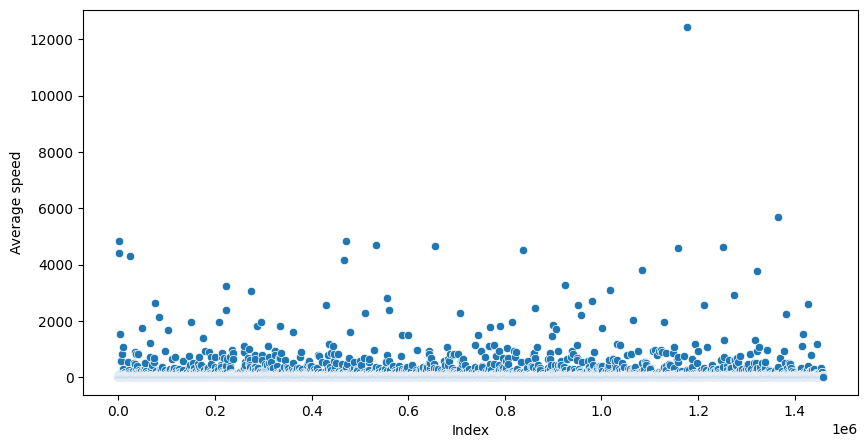

In [14]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [15]:
# маска по продолжительности поездки
mask_time = taxi_data['trip_duration'] > 86400 
print(f"Количество поездок продолжительность которых превышает 24 часа: {taxi_data[mask_time].shape[0]}")
taxi_data = taxi_data[~mask_time]

# маска по средней скорости поездки
mask_speed = avg_speed > 300
print(f"Количество поездок средняя скорость которых превышает 300 км/ч: {taxi_data[mask_speed].shape[0]}")
taxi_data = taxi_data[~mask_speed]

Количество поездок продолжительность которых превышает 24 часа: 4


C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\95129360.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Количество поездок средняя скорость которых превышает 300 км/ч: {taxi_data[mask_speed].shape[0]}")
C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\95129360.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_data = taxi_data[~mask_speed]


Количество поездок средняя скорость которых превышает 300 км/ч: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [16]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

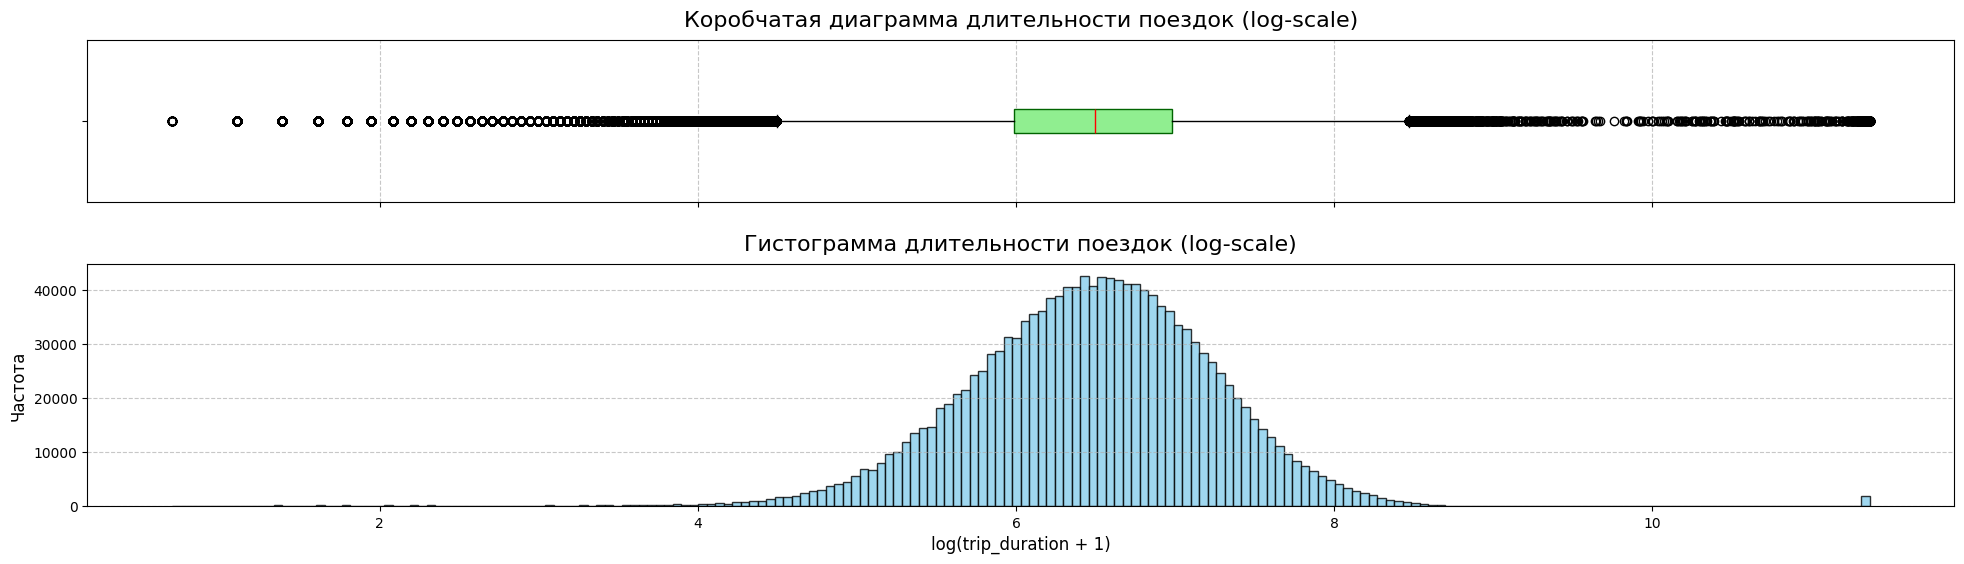

p-value: 0.00
Отвергаем нулевую гипотезу о нормальности - Распределение отлично от нормального!


In [17]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(20, 6), 
                    gridspec_kw={'height_ratios': [2, 3]})

axx[0].boxplot(taxi_data['trip_duration_log'], vert=False, patch_artist=True,
              boxprops=dict(facecolor='lightgreen', color='darkgreen'),
              medianprops=dict(color='red'))
axx[0].set_title('Коробчатая диаграмма длительности поездок (log-scale)', fontsize=16, pad=10)
axx[0].set_yticklabels([])
axx[0].grid(axis='x', linestyle='--', alpha=0.7)

axx[1].hist(taxi_data['trip_duration_log'], bins=200, color='skyblue', edgecolor='black', alpha=0.8)
axx[1].set_title('Гистограмма длительности поездок (log-scale)', fontsize=16, pad=10)
axx[1].set_xlabel('log(trip_duration + 1)', fontsize=12)
axx[1].set_ylabel('Частота', fontsize=12)
axx[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

# Выполняем тест Д’Агостино-Пирсона
stat, p_value = stats.normaltest(taxi_data['trip_duration_log'])
print(f"p-value: {p_value:.2f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу о нормальности - Распределение отлично от нормального!")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальности - Распределение нормальное!")

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\2911114704.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=taxi_data, x='vendor_id', y='trip_duration_log', ax=ax2,
C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\2911114704.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['vendor_id = 1', 'vendor_id = 2'])
C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\2911114704.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


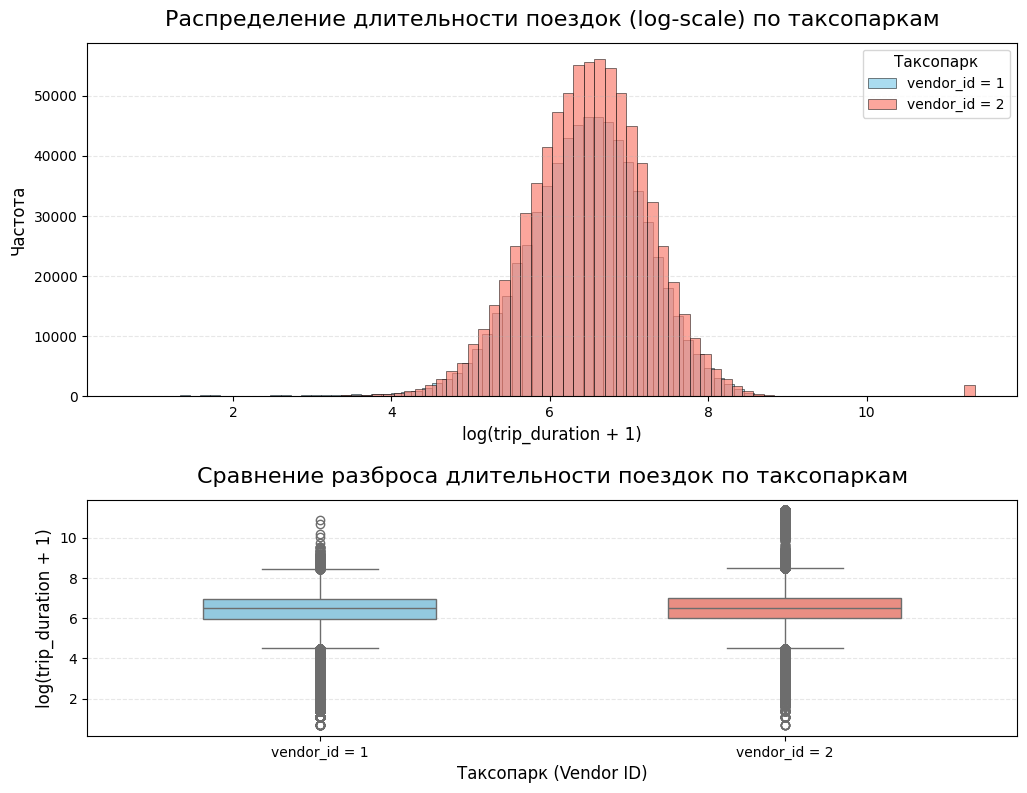

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9),
                    gridspec_kw={'height_ratios': [3, 2], 'hspace': 0.35})

ax1 = axes[0]
ax1.hist(taxi_data['trip_duration_log'][taxi_data['vendor_id']==1], bins=80, alpha=0.7, label='vendor_id = 1',
         color='skyblue', edgecolor='black', linewidth=0.5)
ax1.hist(taxi_data['trip_duration_log'][taxi_data['vendor_id']==2], bins=80, alpha=0.7, label='vendor_id = 2',
         color='salmon', edgecolor='black', linewidth=0.5)
ax1.set_title('Распределение длительности поездок (log-scale) по таксопаркам', fontsize=16, pad=12)
ax1.set_xlabel('log(trip_duration + 1)', fontsize=12)
ax1.set_ylabel('Частота', fontsize=12)
ax1.legend(title='Таксопарк', title_fontsize=11, fontsize=10, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

ax2 = axes[1]
sns.boxplot(data=taxi_data, x='vendor_id', y='trip_duration_log', ax=ax2,
             palette=['skyblue', 'salmon'], width=0.5)

ax2.set_title('Сравнение разброса длительности поездок по таксопаркам', fontsize=16, pad=12)
ax2.set_xlabel('Таксопарк (Vendor ID)', fontsize=12)
ax2.set_ylabel('log(trip_duration + 1)', fontsize=12)
ax2.set_xticklabels(['vendor_id = 1', 'vendor_id = 2'])
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Проанализировав построенные графики можно сделать вывод, что распределения в группах практически не отличаются, признак `vendor_id` не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\3028854448.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log',
C:\Users\Максимка\AppData\Local\Temp\ipykernel_17540\3028854448.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


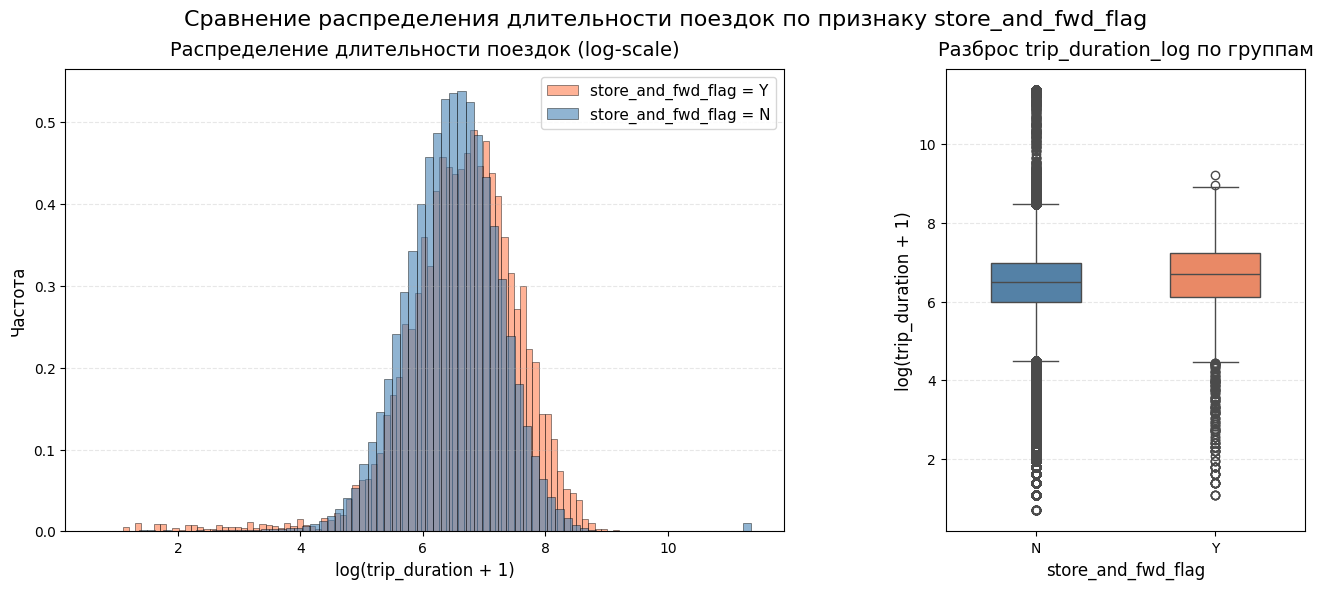

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1], 'wspace': 0.3})

ax1 = axes[0]
ax1.hist(taxi_data['trip_duration_log'][taxi_data['store_and_fwd_flag']=='Y'], bins=80, alpha=0.6, label='store_and_fwd_flag = Y',
         color='coral', edgecolor='black', linewidth=0.5, density=True)
ax1.hist(taxi_data['trip_duration_log'][taxi_data['store_and_fwd_flag']=='N'], bins=80, alpha=0.6, label='store_and_fwd_flag = N',
         color='steelblue', edgecolor='black', linewidth=0.5, density=True)
ax1.set_title('Распределение длительности поездок (log-scale)', fontsize=14, pad=10)
ax1.set_xlabel('log(trip_duration + 1)', fontsize=12)
ax1.set_ylabel('Частота', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

ax2 = axes[1]
sns.boxplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log',
            ax=ax2, palette={'Y': 'coral', 'N': 'steelblue'}, width=0.5)
ax2.set_title('Разброс trip_duration_log по группам', fontsize=14, pad=10)
ax2.set_xlabel('store_and_fwd_flag', fontsize=12)
ax2.set_ylabel('log(trip_duration + 1)', fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Сравнение распределения длительности поездок по признаку store_and_fwd_flag', 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

Проанализировав построенные графики можно сказать, что распределения в группах отличаются, признак `store_and_fwd_flag` имеет значение при определении длительности поездки.  

Если присмотреться к распределению длительности поездок в зависимости от признака `store_and_fwd_flag`, становится ясно, что наиболее длительные поездки принадлежат к группе $Y$ (*Xранить и пересылать поездку*).

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

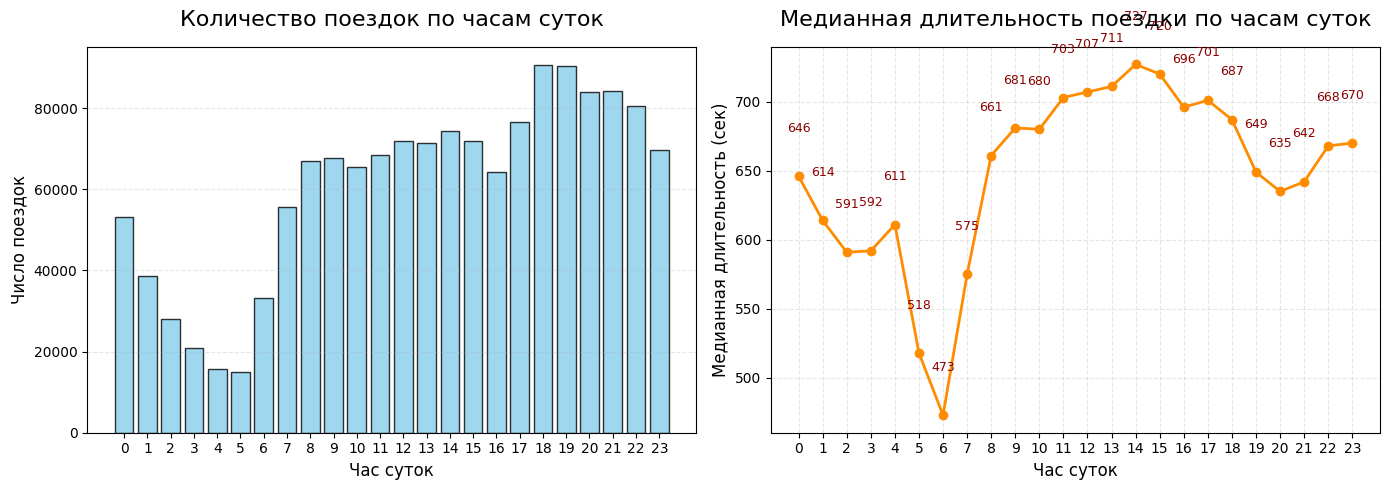

In [20]:
plt.figure(figsize=(14, 5))

# Подсчёт числа поездок по часам
hourly_counts = taxi_data['pickup_hour'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Количество поездок по часам суток', fontsize=16, pad=15)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('Число поездок', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Медианная длительность поездки по часам
plt.subplot(1, 2, 2)

# Группируем по часу, считаем медиану trip_duration
median_duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()

plt.plot(median_duration_by_hour.index, median_duration_by_hour.values,
         marker='o', linewidth=2, color='darkorange')
plt.title('Медианная длительность поездки по часам суток', fontsize=16, pad=15)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('Медианная длительность (сек)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3, linestyle='--')


# Добавляем значения над точками (для наглядности)
for x, y in zip(median_duration_by_hour.index, median_duration_by_hour.values):
    plt.text(x, y + 30, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='darkred')


plt.tight_layout()
plt.show()

a) C 00:00 по 5:00 такси заказывают реже всего.  
б) С 13:00 по 18:00 наблюдается пик медианной длительности поездок.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


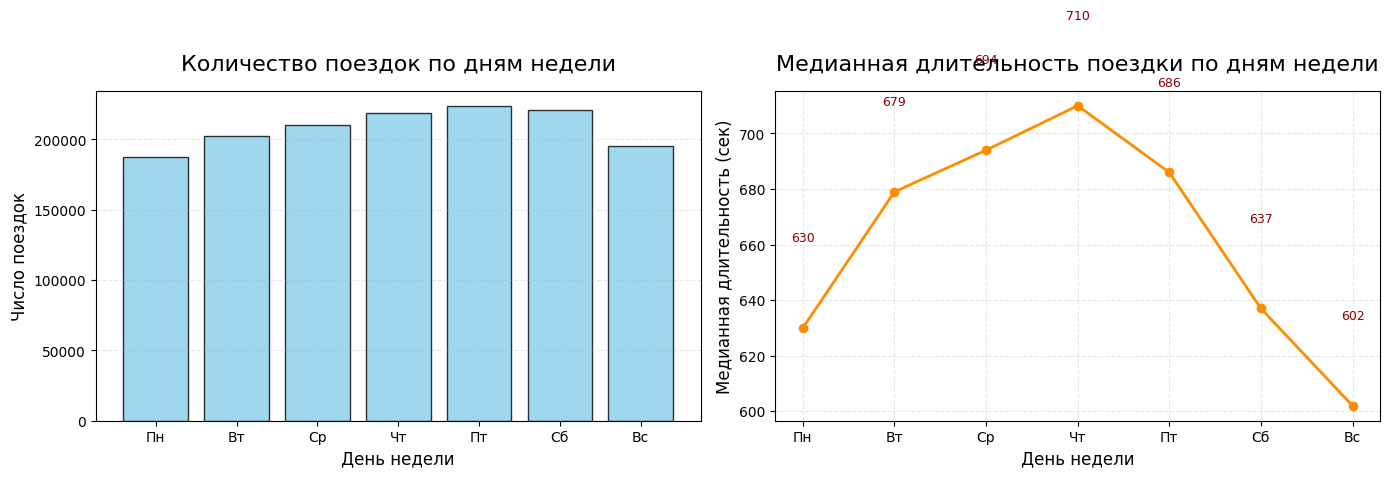

In [21]:
# Названия дней недели для подписей
days_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

plt.figure(figsize=(14, 5))

# Подсчёт числа поездок по дням
daily_counts  = taxi_data['pickup_day_of_week'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(daily_counts.index, daily_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Количество поездок по дням недели', fontsize=16, pad=15)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Число поездок', fontsize=12)
plt.xticks(daily_counts.index, days_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Медианная длительность поездки по дням
plt.subplot(1, 2, 2)

# Группируем по дню недели, считаем медиану trip_duration
median_duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

plt.plot(median_duration_by_day.index, median_duration_by_day.values,
         marker='o', linewidth=2, color='darkorange')
plt.title('Медианная длительность поездки по дням недели', fontsize=16, pad=15)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Медианная длительность (сек)', fontsize=12)
plt.xticks(daily_counts.index, days_names)
plt.grid(alpha=0.3, linestyle='--')


# Добавляем значения над точками (для наглядности)
for x, y in zip(median_duration_by_day.index, median_duration_by_day.values):
    plt.text(x, y + 30, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='darkred')


plt.tight_layout()
plt.show()

а) В пятницу совершается больше всего поездок.  
б) В воскресенье медианная длительность поездок наименьшая.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

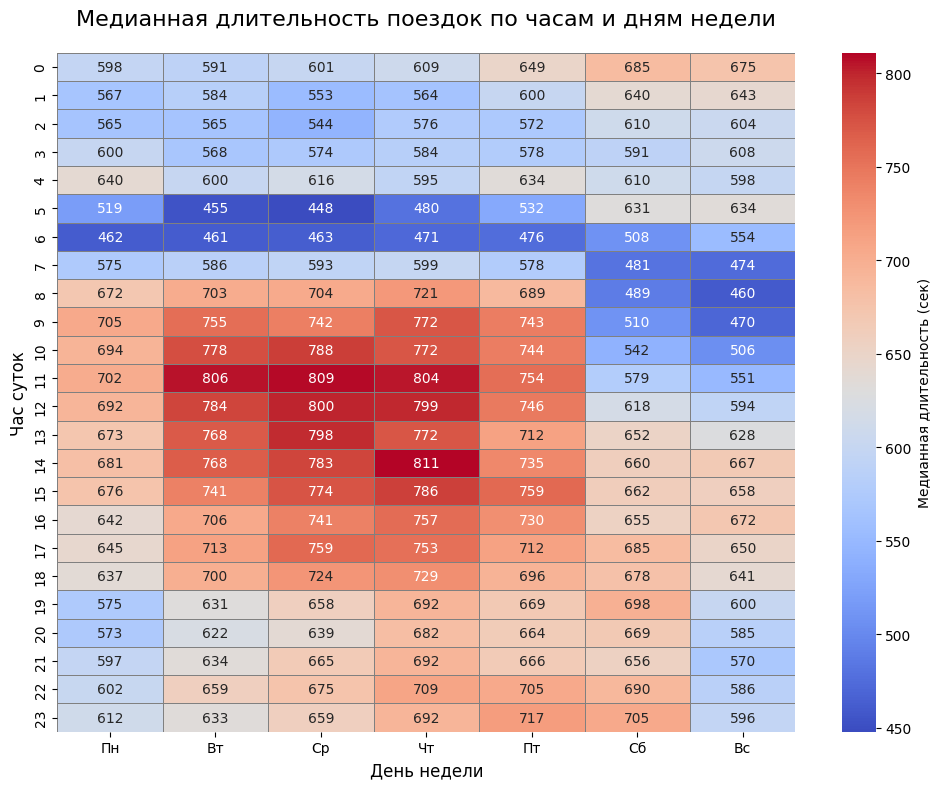

In [22]:
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)

# Переименовываем столбцы (дни недели) для наглядности
pivot_table.columns = days_names

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Медианная длительность (сек)'}
)

plt.title('Медианная длительность поездок по часам и дням недели', fontsize=16, pad=20)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Час суток', fontsize=12)

plt.tight_layout()
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


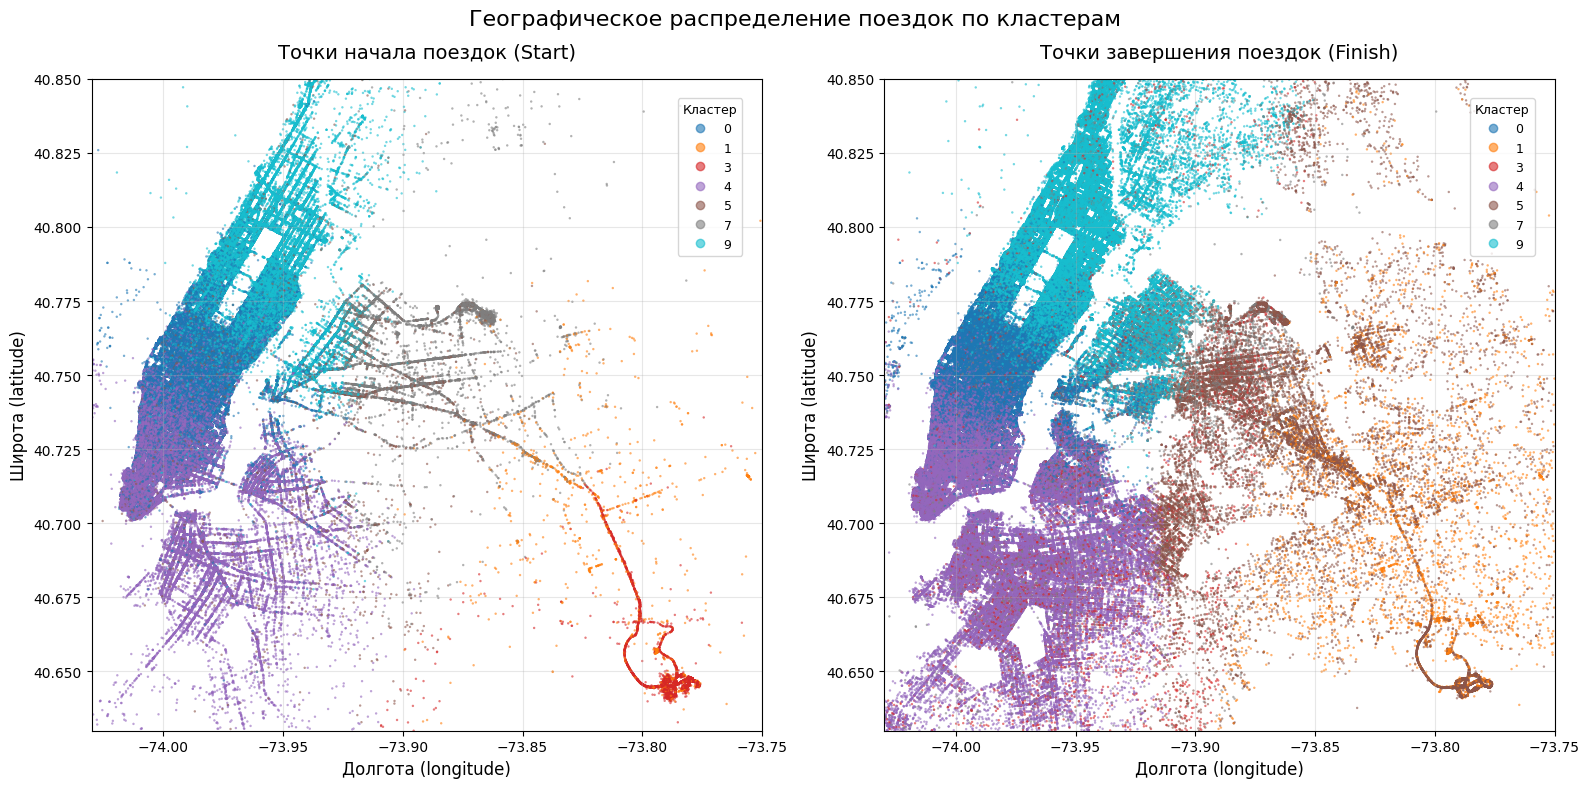

In [23]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Фильтрация данных: оставляем только точки в пределах города
taxi_data_scat = taxi_data[
    (taxi_data['pickup_longitude'].between(*city_long_border)) &
    (taxi_data['pickup_latitude'].between(*city_lat_border)) &
    (taxi_data['dropoff_longitude'].between(*city_long_border)) &
    (taxi_data['dropoff_latitude'].between(*city_lat_border))
].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Палитра для кластеров (10 классов)
cmap = 'tab10'

# Диаграмма рассеяния для точек начала поездок (Start)
ax1 = axes[0]
scatter1 = ax1.scatter(
    taxi_data_scat['pickup_longitude'],
    taxi_data_scat['pickup_latitude'],
    c=taxi_data_scat['geo_cluster'],
    cmap=cmap,
    vmin=0, vmax=9,
    s=3, alpha=0.6, edgecolors='none'
)

ax1.set_xlim(city_long_border)
ax1.set_ylim(city_lat_border)
ax1.set_xlabel('Долгота (longitude)', fontsize=12)
ax1.set_ylabel('Широта (latitude)', fontsize=12)
ax1.set_title('Точки начала поездок (Start)', fontsize=14, pad=15)
ax1.grid(True, alpha=0.3)

# Легенда
legend1 = ax1.legend(*scatter1.legend_elements(), title='Кластер', 
                     loc='upper right', bbox_to_anchor=(0.98, 0.98),
                     frameon=True, fancybox=True, shadow=False, fontsize=9)
legend1.get_title().set_fontsize(9)

# Диаграмма рассеяния для точек завершения поездок (Finish)
ax2 = axes[1]
scatter2 = ax2.scatter(
    taxi_data_scat['dropoff_longitude'],
    taxi_data_scat['dropoff_latitude'],
    c=taxi_data_scat['geo_cluster'],
    cmap=cmap,
    vmin=0, vmax=9,
    s=3, alpha=0.6, edgecolors='none'
)

ax2.set_xlim(city_long_border)
ax2.set_ylim(city_lat_border)
ax2.set_xlabel('Долгота (longitude)', fontsize=12)
ax2.set_ylabel('Широта (latitude)', fontsize=12)
ax2.set_title('Точки завершения поездок (Finish)', fontsize=14, pad=15)
ax2.grid(True, alpha=0.3)

# Легенда
legend2 = ax2.legend(*scatter2.legend_elements(), title='Кластер',
                     loc='upper right', bbox_to_anchor=(0.98, 0.98),
                     frameon=True, fancybox=True, shadow=False, fontsize=9)
legend2.get_title().set_fontsize(9)

plt.suptitle('Географическое распределение поездок по кластерам', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [24]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [25]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности? (**Ответ: id**).  

б) Утечка данных (data leak) - это **ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.**

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных? (**Ответ: dropoff_datetime**)

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?

In [26]:
train_data.drop(columns=['id', 'dropoff_datetime'], inplace=True)
print(f"Число столбцов в таблице: {train_data.shape[1]}")

Число столбцов в таблице: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [27]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [28]:
# Кодирование признака vendor_id
train_data['vendor_id'] = train_data['vendor_id'].replace({1: 0, 2: 1})

# Кодирование признака store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

print(f"Среднее значение по закодированному столбцу vendor_id: {round(train_data['vendor_id'].mean(), 2)}")
print(f"Среднее по закодированному столбцу store_and_fwd_flag: {round(train_data['store_and_fwd_flag'].mean(), 3)}")

Среднее значение по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [29]:
# Инициализируем OneHotEncoder с нужными параметрами
encoder = preprocessing.OneHotEncoder(drop='first', sparse_output=False)

# Выбираем признаки для кодирования
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Применяем кодирование к выбранным столбцам
encoder.fit(train_data[columns_to_change])

# Преобразуем numpy-массив в DataFrame
data_onehot = pd.DataFrame(
    encoder.transform(train_data[columns_to_change]),
    columns=encoder.get_feature_names_out(columns_to_change))

print(f"Получилось сгенерировать {data_onehot.shape[1]} бинарных столбцов")

Получилось сгенерировать 18 бинарных столбцов


Добавим полученную таблицу с закодированными признаками:

In [30]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [31]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [32]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [33]:
# Инициализируем SelectKBest
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=25)

# Обучаем селектор
X_train_sel = selector.fit_transform(X_train, y_train_log)
X_valid_sel = selector.transform(X_valid)

# Получаем имена выбранных признаков
selected_features = X_train.columns[selector.get_support()]

# Создаем новые DataFrame только с выбранными признаками
X_train_25f = X_train[selected_features]
X_valid_25f = X_valid[selected_features]

print("Выбранные признаки:")
for i in (selected_features.tolist()):
    print(i)

Выбранные признаки:
vendor_id
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag
pickup_hour
pickup_holiday
total_distance
total_travel_time
number_of_steps
haversine_distance
temperature
pickup_day_of_week_1
pickup_day_of_week_2
pickup_day_of_week_3
pickup_day_of_week_4
pickup_day_of_week_5
pickup_day_of_week_6
geo_cluster_1
geo_cluster_3
geo_cluster_5
geo_cluster_7
geo_cluster_9


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [34]:
scaler = preprocessing.MinMaxScaler()

# Сохраняем имена колонок и индексы
train_columns = X_train_25f.columns
train_index = X_train_25f.index
valid_columns = X_valid_25f.columns
valid_index = X_valid_25f.index

# Применяем scaler
X_train_sc = scaler.fit_transform(X_train_25f)
X_valid_sc = scaler.transform(X_valid_25f)

# Преобразование обратно в DataFrame
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_25f.columns, index=X_train_25f.index)
X_valid_sc = pd.DataFrame(X_valid_sc, columns=X_valid_25f.columns, index=X_valid_25f.index)

print(f"Среднее арифметическое для первого предиктора (из валидационной выборки): {round(X_valid_sc.iloc[:, 0].mean(), 2)}")

Среднее арифметическое для первого предиктора (из валидационной выборки): 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:

$$z_i=log(y_i+1)$$

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [35]:
# Инициализация и обучение модели
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X_train_sc, y_train_log)

# Предсказания
y_train_log_pred = lin_reg_model.predict(X_train_sc)
y_valid_log_pred = lin_reg_model.predict(X_valid_sc)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)}")

RMSLE на тренировочной выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [36]:
# Инициализация и обучение PolynomialFeatures
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_sc)

# Генерация полиномиальных признаков
X_train_poly = poly.transform(X_train_sc)
X_valid_poly = poly.transform(X_valid_sc)

In [37]:
# Инициализация и обучение модели
lin_reg_poly = linear_model.LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_log)

# Выполняем предсказания
y_train_log_poly_pred = lin_reg_poly.predict(X_train_poly)
y_valid_log_poly_pred = lin_reg_poly.predict(X_valid_poly)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_poly_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_poly_pred)), 2)}")

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.7


Чтобы исправить проблему переобучения, попробуем воспользоваться регуляризацией

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [38]:
# Инициализация и обучение модели
lin_reg_ridge = linear_model.Ridge(alpha=1)
lin_reg_ridge.fit(X_train_poly, y_train_log)

# Выполняем предсказания
y_train_log_ridge_pred = lin_reg_ridge.predict(X_train_poly)
y_valid_log_ridge_pred = lin_reg_ridge.predict(X_valid_poly)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_ridge_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_ridge_pred)), 2)}")

RMSLE на тренировочной выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [39]:
# Инициализация и обучение модели
tree_reg_model = tree.DecisionTreeRegressor(random_state = 42)
tree_reg_model.fit(X_train_sc, y_train_log)

# Выполняем предсказания
y_train_log_tree_pred = tree_reg_model.predict(X_train_sc)
y_valid_log_tree_pred = tree_reg_model.predict(X_valid_sc)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_tree_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_tree_pred)), 2)}")

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.57


Мы знаем, что обучение дерева решений без ограничения его глубины практически всегда приводит к переобучению. Давайте попробуем подобрать оптимальную глубину дерева.

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


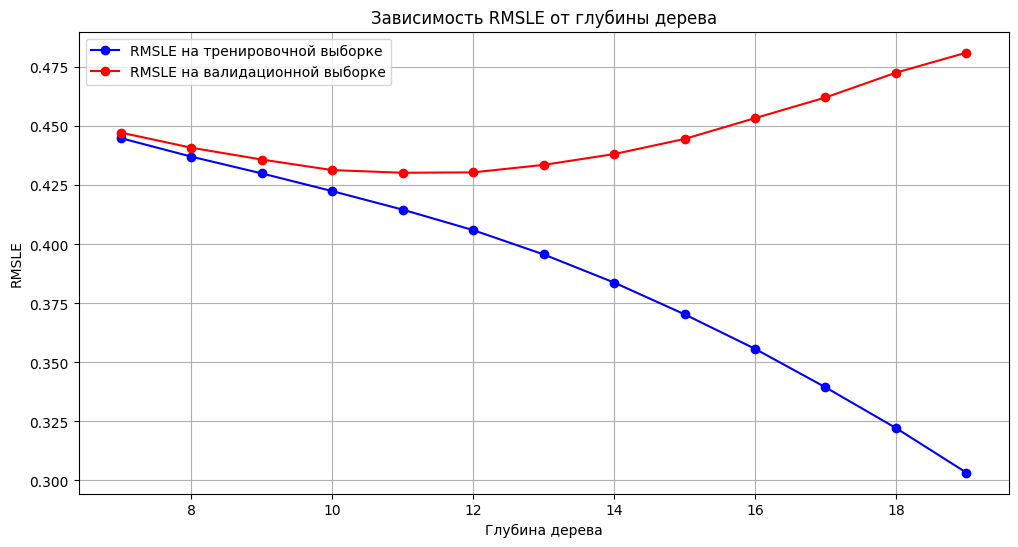

In [40]:
# Зададим диапазон глубин для перебора
max_depths = range(7, 20)

# создадим списки для хранения метрик
train_scores = []
valid_scores = []

# Перебор всех вариантов глубины
for depth in max_depths:

    # Инициализация и обучение модели
    tree_reg_lim_model = tree.DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg_lim_model.fit(X_train_sc, y_train_log)

    # Выполняем предсказания
    y_train_log_tree_lim_pred = tree_reg_lim_model.predict(X_train_sc)
    y_valid_log_tree_lim_pred = tree_reg_lim_model.predict(X_valid_sc)

    # Вычисляем RMSLE и добавляем в соответствующие списки
    train_scores.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_tree_lim_pred)))
    valid_scores.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_tree_lim_pred)))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_scores, 'b-', label='RMSLE на тренировочной выборке', marker='o')
plt.plot(max_depths, valid_scores, 'r-', label='RMSLE на валидационной выборке', marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('RMSLE')
plt.title('Зависимость RMSLE от глубины дерева')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Находим точку, где validation RMSLE минимальна и training RMSLE ещё не слишком низкая
optim_depth = max_depths[np.argmin(valid_scores)]

print(f"Оптимальная глубина дерева решений: {optim_depth}")
print(f"RMSLE на тренировочной выборке: {round(train_scores[np.argmin(valid_scores)], 2)}")
print(f"RMSLE на валидационной выборке: {round(valid_scores[np.argmin(valid_scores)], 2)}")

Оптимальная глубина дерева решений: 11
RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [42]:
# Инициализация и обучение модели
rforest = ensemble.RandomForestRegressor(
    n_estimators=200, max_depth=12, criterion='squared_error', 
    min_samples_split=20, random_state=42, verbose=True, n_jobs=-1)
rforest.fit(X_train_sc, y_train_log)

# Выполняем предсказания
y_train_log_rforest_pred = rforest.predict(X_train_sc)
y_valid_log_rforest_pred = rforest.predict(X_valid_sc)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_rforest_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_rforest_pred)), 2)}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    1.1s
[Parallel(n_jobs=28)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.5s
[Parallel(n_jobs=28)]: Done 200 out of 200 | elapsed:    0.7s finished


RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.41


Благодаря параллельному обучению нескольких деревьев модель случайного леса дала нам небольшой прирост качества по сравнению с обычным деревом решений.

Посмотрим, что будет при последовательном ансамблировании.

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [43]:
# Инициализация и обучение модели
gbr = ensemble.GradientBoostingRegressor(
    learning_rate=0.5, n_estimators=100, max_depth=6, 
    min_samples_split=30, random_state=42, verbose=True)
gbr.fit(X_train_sc, y_train_log)

# Выполняем предсказания
y_train_log_gbr_pred = gbr.predict(X_train_sc)
y_valid_log_gbr_pred = gbr.predict(X_valid_sc)

# Вычисляем RMSLE
print(f"RMSLE на тренировочной выборке: {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_gbr_pred)), 2)}")
print(f"RMSLE на валидационной выборке: {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_gbr_pred)), 2)}")

      Iter       Train Loss   Remaining Time 
         1           0.3110           10.18m
         2           0.2247            9.99m
         3           0.1987            9.82m
         4           0.1876            9.68m
         5           0.1823            9.59m
         6           0.1783            9.46m
         7           0.1756            9.40m
         8           0.1730            9.29m
         9           0.1709            9.18m
        10           0.1696            9.06m
        20           0.1577            8.04m
        30           0.1538            7.01m
        40           0.1502            5.98m
        50           0.1480            4.97m
        60           0.1451            3.96m
        70           0.1431            2.96m
        80           0.1410            1.97m
        90           0.1393           58.97s
       100           0.1383            0.00s
RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
Ответ: **Градиентный бустинг над деревьями решений!**

Теперь давайте посмотрим на важность факторов для наилучшей ансамблевой модели.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Text(0, 0.5, 'Важность признака')

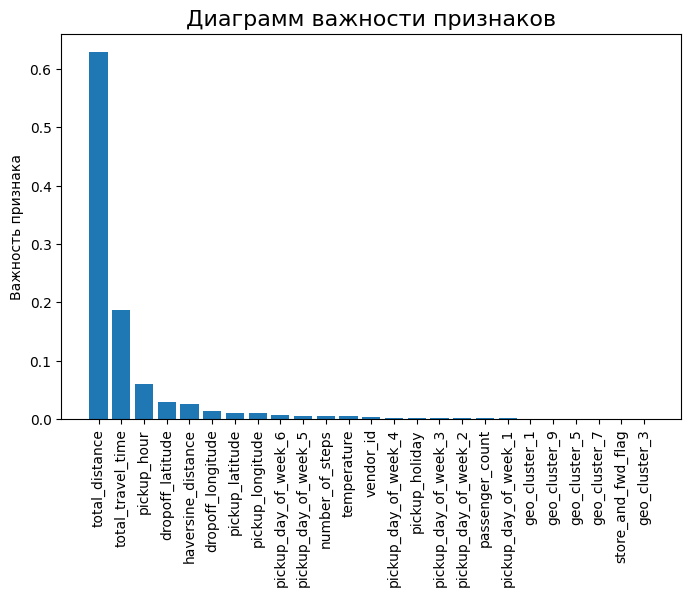

In [44]:
imp_feat = pd.Series(
    data=gbr.feature_importances_,
    index=selected_features)
imp_feat.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(8, 5))
plt.bar(imp_feat.index,  imp_feat.values)
axes.xaxis.set_tick_params(rotation=90)
axes.set_title('Диаграмм важности признаков', fontsize=16)
axes.set_ylabel('Важность признака')

Укажите топ-3 факторов, наиболее значимых для предсказания целевого признака (длительности поездки) в логарифмическом масштабе:  
1. `total_distance`;  
2. `total_travel_time`;  
3. `pickup_hour`

Несмотря на все преимущества, у метрики `RMSLE` есть один недостаток — она не является интерпретируемой. Нам хотелось бы понять, насколько наша итоговая модель хорошо предсказывает целевой признак с точки зрения бизнес-процесса. Точнее, мы бы хотели получить более понятное представление об ошибке прогноза длительности поездки.

### Задание 6.5.

Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.

In [45]:
y_valid_gbr_pred = np.exp(y_valid_log_gbr_pred) - 1
y_valid = np.exp(y_valid_log) - 1
print(f"MeAE на валидационной выборке для модели градиентного бустинга: {round(metrics.median_absolute_error(y_valid, y_valid_gbr_pred) / 60, 1)} мин")

MeAE на валидационной выборке для модели градиентного бустинга: 1.8 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. (Файл с тестовой выборкой вы можете найти [здесь](https://drive.google.com/file/d/1C2N2mfONpCVrH95xHJjMcueXvvh_-XYN/view?usp=sharing), а файл с данными из OSRM API для тестовой выборки — [здесь](https://drive.google.com/file/d/1wCoS-yOaKFhd1h7gZ84KL9UwpSvtDoIA/view?usp=sharing).)

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [46]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [47]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'])
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].replace({1: 0, 2: 1})
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].replace(
    {'N': 0, 'Y': 1})
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
test_data_onehot = pd.DataFrame(encoder.transform(test_data[columns_to_change]),
    columns=encoder.get_feature_names_out(columns_to_change))

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), 
     test_data_onehot], axis=1
)
X_test = np.array(test_data[selected_features])
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


c:\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [48]:
# Делаем предсказание длительности поездки для тестовой выборки при помощи модели градиентного бустинга
y_pred_test = np.exp(gbr.predict(X_test_scaled)) - 1

# Создаём submission-файл
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_pred_test})
submission.to_csv('./submission_gb.csv', index=False)

c:\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.

Импортируем модуль **xgboost**:

In [49]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [50]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_sc, label=y_train_log, feature_names=selected_features.tolist())
dvalid = xgb.DMatrix(X_valid_sc, label=y_valid_log, feature_names=selected_features.tolist())
dtest = xgb.DMatrix(X_test_scaled, feature_names=selected_features.tolist())

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [51]:
# Гиперпараметры модели
xgb_param = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }

# Тренировочная и валидационная выборки
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Обучаем модель XGBoost
model_xgb = xgb.train(
    params=xgb_param, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #ранняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.73989	valid-rmse:0.74190
[10]	train-rmse:0.49091	valid-rmse:0.49352
[20]	train-rmse:0.44087	valid-rmse:0.44370
[30]	train-rmse:0.42623	valid-rmse:0.42922
[40]	train-rmse:0.41898	valid-rmse:0.42220
[50]	train-rmse:0.41328	valid-rmse:0.41677
[60]	train-rmse:0.40986	valid-rmse:0.41368
[70]	train-rmse:0.40683	valid-rmse:0.41099
[80]	train-rmse:0.40443	valid-rmse:0.40884
[90]	train-rmse:0.40217	valid-rmse:0.40689
[100]	train-rmse:0.40058	valid-rmse:0.40561
[110]	train-rmse:0.39935	valid-rmse:0.40468
[120]	train-rmse:0.39821	valid-rmse:0.40383
[130]	train-rmse:0.39689	valid-rmse:0.40281
[140]	train-rmse:0.39579	valid-rmse:0.40199
[150]	train-rmse:0.39457	valid-rmse:0.40097
[160]	train-rmse:0.39363	valid-rmse:0.40027
[170]	train-rmse:0.39285	valid-rmse:0.39972
[180]	train-rmse:0.39207	valid-rmse:0.39921
[190]	train-rmse:0.39135	valid-rmse:0.39878
[200]	train-rmse:0.39058	valid-rmse:0.39833
[210]	train-rmse:0.38949	valid-rmse:0.39756
[220]	train-rmse:0.38870	valid-rmse:0.39709

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [52]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model_xgb.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model_xgb.best_score)

Modeling RMSLE 0.39408


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

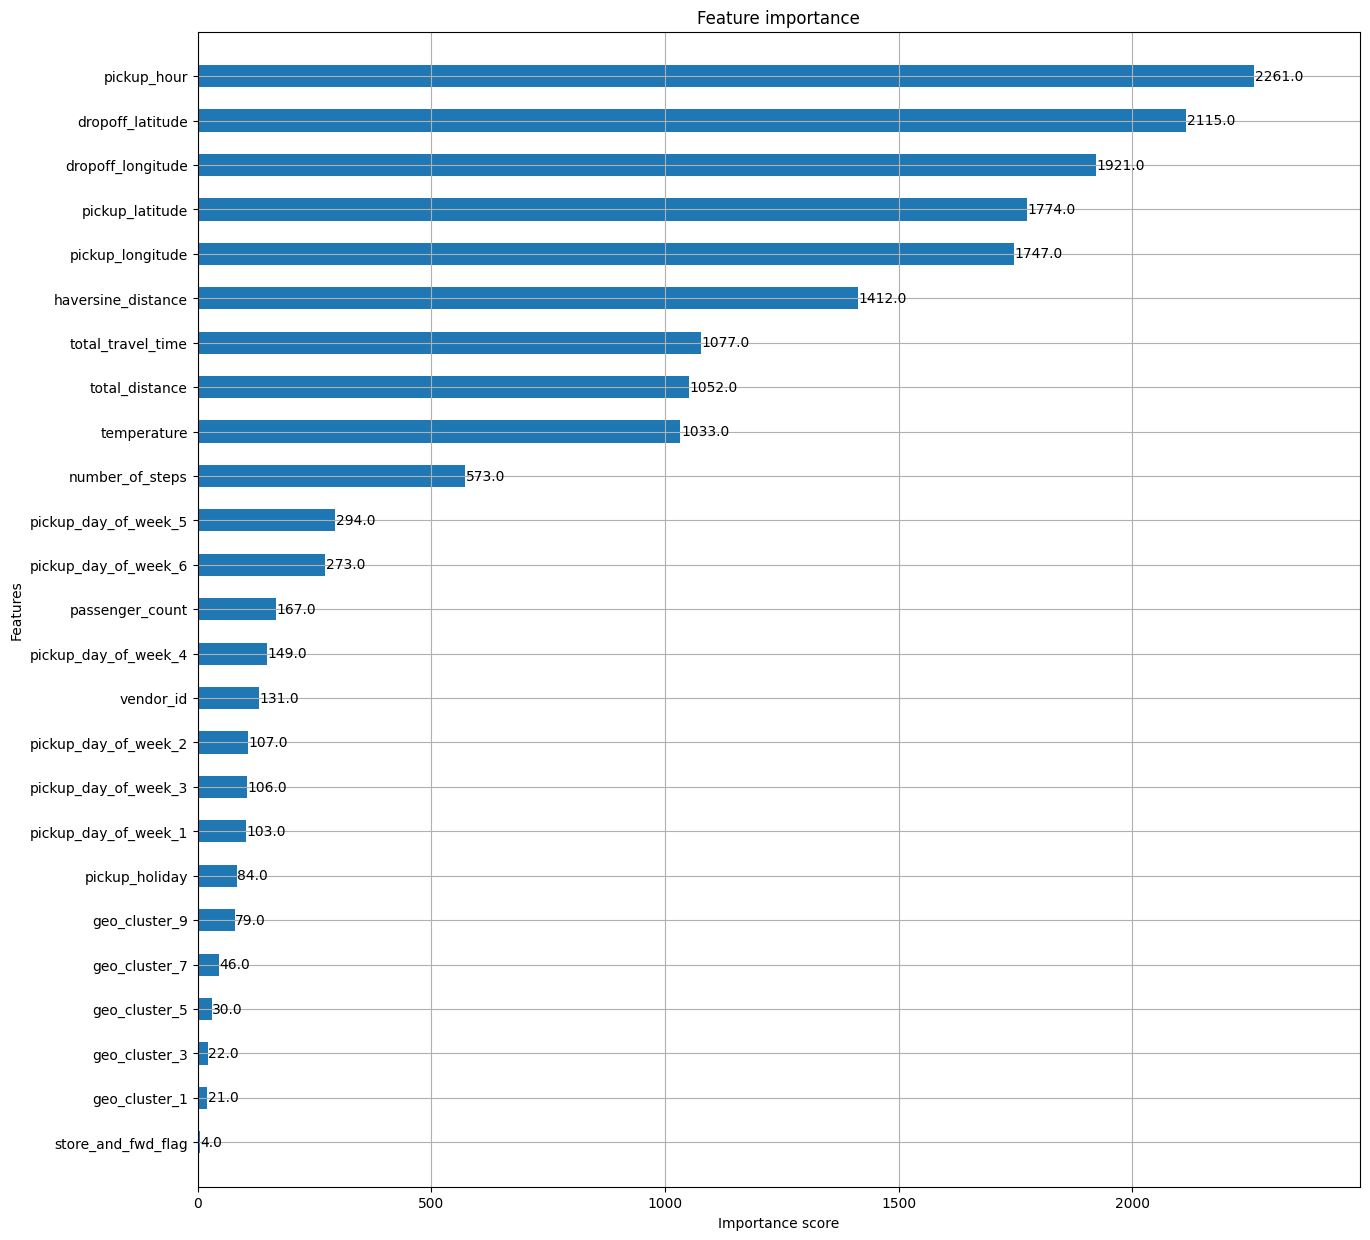

In [53]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model_xgb, ax = ax, height=0.5)